In [1]:
from surprise import Dataset
from surprise import Reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as pic
import os

In [2]:
#load the data
file_path = os.path.expanduser('..../restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [3]:
#Q5
from surprise import SVD
from surprise.model_selection import cross_validate

algorithm = SVD()
performance = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",performance)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9429  0.9386  0.9529  0.9448  0.0060  
MAE (testset)     0.7424  0.7409  0.7534  0.7456  0.0056  
Fit time          8.27    9.49    8.89    8.88    0.50    
Test time         0.46    0.47    0.42    0.45    0.02    
Performance: {'test_rmse': array([0.94293863, 0.93863893, 0.95293264]), 'test_mae': array([0.74241899, 0.74086305, 0.75339018]), 'fit_time': (8.269425630569458, 9.49140191078186, 8.89203953742981), 'test_time': (0.4605598449707031, 0.468641996383667, 0.41976118087768555)}


In [4]:
#Q6
algorithm = SVD(biased=False)
performance = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",performance)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9700  0.9690  0.9637  0.9676  0.0027  
MAE (testset)     0.7642  0.7644  0.7608  0.7631  0.0016  
Fit time          8.10    8.22    8.20    8.17    0.05    
Test time         0.42    0.42    0.41    0.42    0.00    
Performance: {'test_rmse': array([0.96996277, 0.96898643, 0.96374566]), 'test_mae': array([0.7641832 , 0.76436313, 0.76082313]), 'fit_time': (8.098103284835815, 8.220638513565063, 8.201462507247925), 'test_time': (0.42316269874572754, 0.4173624515533447, 0.4139583110809326)}


In [5]:
#Q7
from surprise import NMF
algorithm = NMF()
performance = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",performance)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9675  0.9779  0.9752  0.9735  0.0044  
MAE (testset)     0.7612  0.7669  0.7662  0.7648  0.0025  
Fit time          8.31    8.39    8.43    8.38    0.05    
Test time         0.39    0.35    0.39    0.38    0.02    
Performance: {'test_rmse': array([0.96752666, 0.97785106, 0.97515353]), 'test_mae': array([0.76121701, 0.76685842, 0.76621368]), 'fit_time': (8.309588193893433, 8.390702247619629, 8.432305335998535), 'test_time': (0.3937699794769287, 0.34644103050231934, 0.3949742317199707)}


In [6]:
#Q8
from surprise import KNNBasic

algorithm = KNNBasic(sim_options = {
'user_based': True
})
performance = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",performance)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9869  0.9877  0.9887  0.9878  0.0007  
MAE (testset)     0.7810  0.7816  0.7812  0.7813  0.0003  
Fit time          0.68    0.69    0.69    0.69    0.00    
Test time         9.76    9.90    9.82    9.83    0.06    
Performance: {'test_rmse': array([0.98693361, 0.98774659, 0.9887317 ]), 'test_mae': array([0.78098146, 0.78161604, 0.78119535]), 'fit_time': (0.6807763576507568, 0.6872785091400146, 0.688838005065918), 'test_time': (9.763636350631714, 9.902631044387817, 9.819319009780884)}


In [7]:
#Q9
algorithm = KNNBasic(sim_options = {
'user_based': False
})
performance = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",performance)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9845  0.9811  0.9913  0.9856  0.0042  
MAE (testset)     0.7787  0.7771  0.7853  0.7804  0.0036  
Fit time          0.96    0.96    0.96    0.96    0.00    
Test time         11.16   11.15   11.18   11.16   0.01    
Performance: {'test_rmse': array([0.98450995, 0.98110605, 0.99125019]), 'test_mae': array([0.77871822, 0.77706522, 0.78534741]), 'fit_time': (0.9563853740692139, 0.9562363624572754, 0.9574930667877197), 'test_time': (11.15695595741272, 11.15442943572998, 11.183112382888794)}


In [8]:
#Q14.a.1

import random
import numpy as np
set_seed = 10
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'MSD',
'user_based': True
})
name_user_01 = "MSD"
per_user_01 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_user_01)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9932  0.9894  0.9829  0.9885  0.0043  
MAE (testset)     0.7824  0.7825  0.7798  0.7816  0.0013  
Fit time          0.68    0.69    0.67    0.68    0.01    
Test time         10.14   10.08   9.66    9.96    0.22    
Performance: {'test_rmse': array([0.99324973, 0.9893548 , 0.98290869]), 'test_mae': array([0.78244432, 0.782527  , 0.77981999]), 'fit_time': (0.6757309436798096, 0.6907351016998291, 0.6720917224884033), 'test_time': (10.142410039901733, 10.079113483428955, 9.655665636062622)}


In [9]:
#Q14.a.2
set_seed = 11
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'cosine',
'user_based': True
})
name_user_02 = "cosine"
per_user_02 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_user_02)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0232  1.0171  1.0224  1.0209  0.0027  
MAE (testset)     0.8104  0.8056  0.8086  0.8082  0.0020  
Fit time          2.55    2.53    2.52    2.53    0.01    
Test time         9.75    10.09   10.08   9.97    0.16    
Performance: {'test_rmse': array([1.02318585, 1.0171197 , 1.02244063]), 'test_mae': array([0.81035597, 0.80561246, 0.80864363]), 'fit_time': (2.5462515354156494, 2.527547836303711, 2.524477243423462), 'test_time': (9.74948525428772, 10.094012975692749, 10.0761079788208)}


In [10]:
#Q14.a.3
set_seed = 12
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'pearson',
'user_based': True
})
name_user_03 = "pearson"
per_user_03 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_user_03)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0265  1.0178  1.0160  1.0201  0.0046  
MAE (testset)     0.8151  0.8099  0.8040  0.8097  0.0045  
Fit time          3.22    3.14    3.75    3.37    0.27    
Test time         9.73    10.74   11.47   10.65   0.71    
Performance: {'test_rmse': array([1.02650455, 1.0177937 , 1.01602751]), 'test_mae': array([0.81511994, 0.80993618, 0.80401723]), 'fit_time': (3.2193992137908936, 3.1439430713653564, 3.7518582344055176), 'test_time': (9.733825206756592, 10.738374471664429, 11.473259210586548)}


In [11]:
#Q14.b.1
set_seed = 13
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'MSD',
'user_based': False
})
name_item_01 = "MSD"
per_item_01 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_item_01)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9857  0.9869  0.9860  0.9862  0.0005  
MAE (testset)     0.7801  0.7814  0.7810  0.7808  0.0005  
Fit time          0.96    0.94    0.96    0.95    0.01    
Test time         11.44   11.30   11.66   11.47   0.15    
Performance: {'test_rmse': array([0.98567836, 0.98692888, 0.98598088]), 'test_mae': array([0.78008159, 0.78138437, 0.78096529]), 'fit_time': (0.958052396774292, 0.9423632621765137, 0.9586503505706787), 'test_time': (11.443639993667603, 11.296419143676758, 11.655132293701172)}


In [12]:
#Q14.b.2
set_seed = 14
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'cosine',
'user_based': False
})
name_item_02 = "cosine"
per_item_02 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_item_02)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0394  1.0325  1.0345  1.0355  0.0029  
MAE (testset)     0.8240  0.8212  0.8206  0.8219  0.0015  
Fit time          3.75    3.72    3.74    3.74    0.02    
Test time         11.40   11.06   11.15   11.20   0.14    
Performance: {'test_rmse': array([1.03943635, 1.03246495, 1.03447997]), 'test_mae': array([0.82399748, 0.82124484, 0.82059658]), 'fit_time': (3.7535924911499023, 3.7170140743255615, 3.743936061859131), 'test_time': (11.39526915550232, 11.056439638137817, 11.145042657852173)}


In [13]:
#Q14.b.3
set_seed = 15
random.seed(set_seed)
np.random.seed(set_seed)

algorithm = KNNBasic(sim_options = {
'name':'pearson',
'user_based': False
})
name_item_03 = "pearson"
per_item_03 = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("Performance:",per_item_03)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0453  1.0546  1.0484  1.0495  0.0039  
MAE (testset)     0.8388  0.8418  0.8381  0.8396  0.0016  
Fit time          4.81    4.79    4.76    4.79    0.02    
Test time         11.13   10.90   11.67   11.23   0.32    
Performance: {'test_rmse': array([1.0453271 , 1.05463677, 1.04840311]), 'test_mae': array([0.83884587, 0.84183615, 0.83807589]), 'fit_time': (4.812795877456665, 4.789836168289185, 4.764147758483887), 'test_time': (11.13214635848999, 10.904601573944092, 11.66590428352356)}


('MSD', 'cosine', 'pearson')
User based RMSE values are  (0.9885044070980563, 1.020915392819005, 1.020108586867834)
Item based RMSE values are  (0.9861960408165996, 1.0354604233687503, 1.049455661151563)


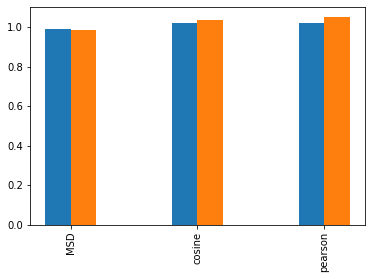

In [15]:
Name_User = (name_user_01, name_user_02, name_user_03)
User_rmse = (per_user_01['test_rmse'].mean(), per_user_02['test_rmse'].mean(), per_user_03['test_rmse'].mean())
User_mae = (per_user_01['test_mae'].mean(), per_user_02['test_mae'].mean(), per_user_03['test_mae'].mean())

Name_Item = (name_item_01, name_item_02, name_item_03)
Item_rmse = (per_item_01['test_rmse'].mean(), per_item_02['test_rmse'].mean(), per_item_03['test_rmse'].mean())
Item_mae = (per_item_01['test_mae'].mean(), per_item_02['test_mae'].mean(), per_item_03['test_mae'].mean())

a = np.arange(3)
ax1 = pic.subplot(1,1,1)
b=0.2

print(Name_User)
print("User based RMSE values are ", User_rmse)
print("Item based RMSE values are ", Item_rmse)

pic.bar(a, User_rmse, b)
pic.bar(a + b, Item_rmse,b)

pic.xticks(a + b / 2, Name_User, rotation='vertical')
pic.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

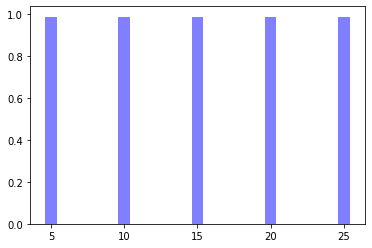

In [16]:
#Q15.a
measure = []
method =''
k_val=(5,10,15,20,25)
for kvalue in k_val:

    for algorithm in [(KNNBasic(k_val=kvalue, sim_options = {'method':'MSD', 'user_based': True }))]:
    
       
  
        performance = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
   
        data_temp = pd.DataFrame.from_dict(performance).mean(axis=0)
        data_temp = data_temp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        measure.append(data_temp)
    
UserBased_Dataset=pd.DataFrame(measure).set_index('Algorithm').sort_values('test_rmse')
print(UserBased_Dataset)
pic.bar(k_val,UserBased_Dataset.test_rmse,color='blue',align='center', alpha=0.5)
pic.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

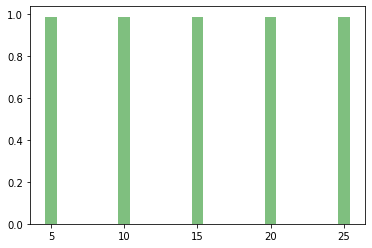

In [17]:
#Q15.b
measure = []
for kvalue in k_val:

    for algorithm in [(KNNBasic(k_val=kvalue, sim_options = {'name':'MSD', 'user_based': False }))]:
        performance = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
        data_temp = pd.DataFrame.from_dict(performance).mean(axis=0)
        data_temp = data_temp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        measure.append(data_temp)
    
ItemBased_Dataset=pd.DataFrame(measure).set_index('Algorithm').sort_values('test_rmse')
print(ItemBased_Dataset)
pic.bar(k_val,ItemBased_Dataset.test_rmse,color='green',align='center', alpha=0.5)
pic.show()